In [1]:
%load_ext autoreload
%autoreload 2

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [107]:
# Load connectome and normalize it

W=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")
W=W/W.sum(axis=1)[:,None]

In [108]:
# Create brain object and set its parameters

brain=HTC.Brain(W)
brain.set_netowrk_parameters(2/998,(2/998)**(1/5),(2/998)**(1/5)/(1+2*(2/998)**(1/5))/1.2)
brain.set_simulation_parameters(0.1,200,100)

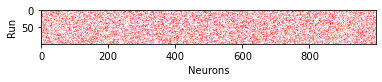

In [143]:
# Generate initial configuration with 50% active neurons

states = HTC.generate_initial_conf(0.5) # with random configurations
activity=np.zeros((brain.n_timesteps, brain.n_runs, brain.n_neurons)) #storing time, run and activity

plt.xlabel("Neurons")
plt.ylabel("Run")
_=plt.imshow(S, cmap='bwr')

In [146]:
%%time
# Evolve over time the states (save every step in activity matrix)

for t in range(brain.n_timesteps):
    S, activity[t] = HTC.update_states(brain.r1, brain.r2, brain.tc, W, S)

CPU times: user 17.1 s, sys: 3.83 s, total: 21 s
Wall time: 5.55 s


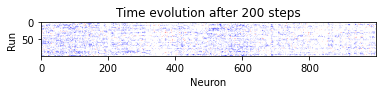

In [152]:
# Display state patterns after 200 steps

plt.xlabel("Neuron")
plt.ylabel("Run")
plt.title("Time evolution after "+str(brain.n_timesteps)+" steps")
_=plt.imshow(S[:,], cmap='bwr')

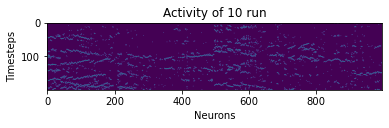

In [161]:
# Display activity over time
run=10
plt.title("Activity of "+str(run)+" run")
plt.ylabel("Timesteps")
plt.xlabel("Neurons")
_=plt.imshow(activity[:,run])